In [6]:
import torch, torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import torch.utils
from alexnet import AlexNet
import torch.nn as nn
from torch.optim import Adam


In [7]:
W = 227 # minimum width for input to pass through alexnet
transform = transforms.Compose([
    transforms.Resize((W, W)), # the original mnist image size is 28*28, alexnet input size is 227*227
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

train = MNIST(root='./data', train=True, download=True, transform=transform)
test = MNIST(root='./data', train=False, download=True, transform=transform)

In [8]:
batch_size = 64

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size, shuffle=False)

model = AlexNet(10, 1)

/home/anyxling/lxl/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [9]:
learning_rate = 0.01
num_epochs = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

In [12]:
train_losses = []

model = model.to(device)
for epoch in range(num_epochs):
    for idx, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        # print(labels.shape, outputs.shape, images.shape)
        loss = criterion(outputs, labels)
        train_losses.append(loss.item())
        # backward and optimize 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("epoch:" + str(epoch) + "loss:" + str(loss))



epoch:0loss:tensor(7.7425, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch:1loss:tensor(68.1909, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch:2loss:tensor(3.4977, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch:3loss:tensor(4.6429, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch:4loss:tensor(12.5903, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch:5loss:tensor(1.8836, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch:6loss:tensor(2.0705, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch:7loss:tensor(1.7571, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch:8loss:tensor(5.3725, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch:9loss:tensor(11.0341, device='cuda:0', grad_fn=<NllLossBackward0>)


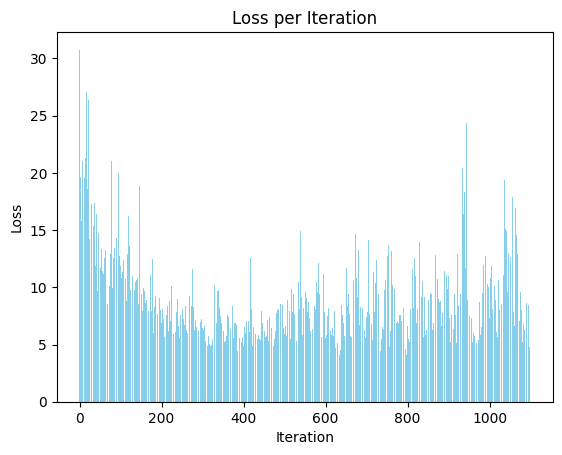

In [19]:
import matplotlib.pyplot as plt
plt.bar(range(len(train_losses)), train_losses, color='skyblue')
# plt.bar(range(len(train_losses[400:1500])), train_losses[400:1500], color='skyblue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss per Iteration')
plt.show()